# TP 4 : Graphisme

# 1. Croissance de quelques fonctions

Afficher les courbes $y=x$, $y=x\cdot\log_2(x)$, $y=x^2$ sur un même graphique
- en utilisant `plot` de `sympy` 
- en utilisant `plot` de `matplotlib`

Faites varier l'intervalle du tracé en $x$ pour afficher les croisances relatives, en particulier pour de petites valeurs de l'intervalle $]0,4]$, par exemple.

In [67]:
from numpy import *
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
x = symbols('x')
y1 = x ; y2 = x * log(x,2) ; y3 = x**2

/usr/local/lib/python3.6/dist-packages/sympy/plotting/experimental_lambdify.py:232: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


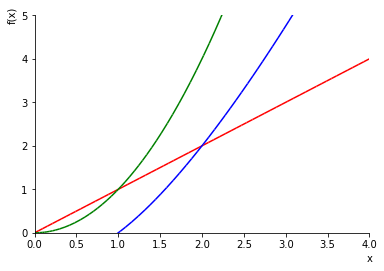

In [21]:
p1 = plot(y1,(x,0,4),show=False,line_color='r',ylim=(0,5))
p2 = plot(y2,(x,0,4),show=False,line_color='b')
p3 = plot(y3,(x,0,4),show=False,line_color='g')
p1.extend(p2); p1.extend(p3)
p1.show()

On observe que ces courbes ont des points d'intersection. Sauriez-vous les retrouver formellement?

In [23]:
pt_intersection_y1_y2 = solve(y1-y2,x)
pt_intersection_y1_y3 = solve(y1-y3,x)
## x - x*log(x,2) = 0  ==> x*(1-log(x,2)) ==> x = 0 ou log(x,2)=1 ; x = 2
## x - x**2 = 0 ==> x = 1 ou x = 0
## points d'intersection entre ces courbes en (0,0),(1,1),(2,2)

1

# 2. Tracé avec une équation polaire

Un point $M(x,y)$ dans le plan peut être caractérisé
- par ses coordonnées cartésiennes $(x,y)$
- par ses coordonnées polaires:
    - $\rho$: la norme du vecteur $\overrightarrow{OM}$
    -  $\theta$: l'angle entre l'axe des abcisses et le vecteur $\overrightarrow{OM}$
    
On peut définir une *équation polaire* d'une courbe comme le paramétrage de la courbe par l'angle $\theta$ qui définit $\rho$ comme une fonction de $\theta$.

**Exemple:** On définit la courbe du bifolium régulier par l'équation polaire $$\rho=a(sin\theta + sin 3\theta)$$

Elle est représentée ci-dessous pour la valeur de $a=8$:

On peut transformer les coordonnées polaires en coordonnées cartésiennes en posant $x=\rho\cos\theta$, $y=\rho\sin\theta$ et $\rho=\sqrt{x^2+y^2}$

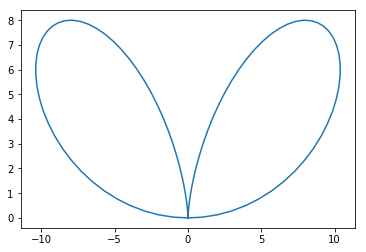

1. Dessinez la courbe du bifolium régulier définie ci-dessus.
2. Dessinez une courbe à choisir dans l'[annuaire des courbes](https://www.mathcurve.com/courbes2d/courbes2d.shtml) si vous avez le temps

Attention, il y a un petit piège !

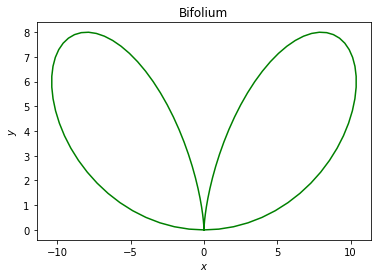

In [5]:
from numpy import * 
import matplotlib.pyplot as plt

theta = linspace(0,pi,100)
x = [8*(sin(i)+sin(3*i))*cos(i) for i in theta]
y = [8*(sin(i)+sin(3*i))*sin(i) for i in theta]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title("Bifolium")
ax.plot(x,y,c='g')

In [61]:
theta = arange(0, pi, 0.001)
r = 8*(sin(theta)+sin(3*theta))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title("Bifolium")
ax.plot(theta,r,c='g')

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5,1,1.5,2])
ax.set_rlabel_position(-22.5)
ax.grid(True)
ax.set_title("Bifolium")
plt.show()

# 3. Interpolation

Comme fait en cours essayez de perturber un peu les valeurs sur des cubiques pour retrouver le meilleur polynôme d'interpolation et affichez sur un même graphique le nuage des valeurs et la courbe d'interpolation.

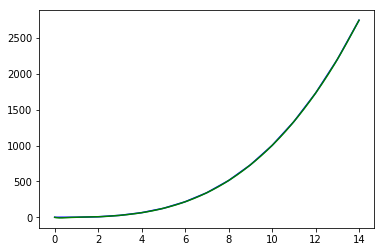

In [75]:
from random import random
from scipy.interpolate import interp1d, lagrange

x = [i for i in range(15)]
y = [(i**3)+ random() for i in range(15)]
p=lagrange(x,y)
xs = linspace(0,14,200)
ys = p(xs)
plt.plot(x,y,c='b')
plt.plot(xs,ys,c='g')

# 4. Graphique 3D

Reprenez les bijections de $N^2\rightarrow N$ et essayez de les afficher sur un même graphique 3D pour $0\leq x,y\leq 4$ et sous la forme de deux nuages de points de deux couleurs différentes.

Vous pourrez, pour ce faire, vous inspirer de l'exemple ci-dessous qu'on retrouve [sur le web](https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/) et la [doc](https://matplotlib.org/tutorials/toolkits/mplot3d.html#the-mplot3d-toolkit)

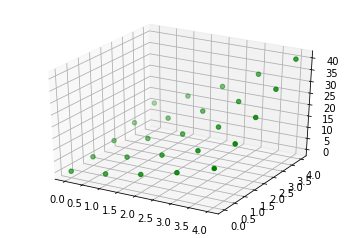

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()   # crée la figure
ax = fig.add_subplot(111, projection='3d') 

x = []
y = []
z = []

def f(x1,y1): return ((x1+y1)**2+3*x1+y1)/2
def g(x,y) : return  (3*x+y+(x+y)**2)/2


for i in range(5) :
    for j in range(5):
        x.append(i)
        y.append(j)
        z.append(f(i,j))
        

ax.scatter(x,y,z,c='g')
plt.show()


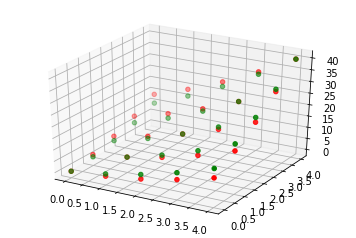

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()   # crée la figure
ax = fig.add_subplot(111, projection='3d') 

x = []
y = []
z = []
z2 = []
def f(x1,y1): return ((x1+y1)**2+3*x1+y1)/2
def g(x,y) : return  (y+(x+y)*(x+y+1)/2)


for i in range(5) :
    for j in range(5):
        x.append(i)
        y.append(j)
        z.append(f(i,j))
        z2.append(g(i,j))
        
        

ax.scatter(x,y,z,c='g')
ax.scatter(x,y,z2,c='r')
plt.show()

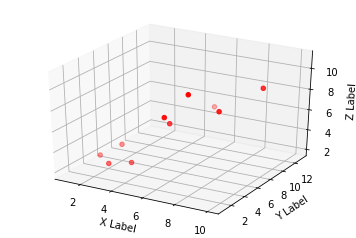

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()   # crée la figure
ax = fig.add_subplot(111, projection='3d') 
# dessus, on instancie la figure avec des axes 3D

# valeurs des points en x,y et z
x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Références

- [polaire-paramétrique](http://www.matheatre.fr/Maths/Ana/Docs/Ma_Ana_coordonnees-et-equations.pdf)
- [pareil](http://gilles.dubois10.free.fr/geometrie_affine/coniquesequpol.html)
